## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

Просто знаем, что, посчитав руками, мы получим $\dfrac{2}{3}$

2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [128]:
import numpy as np
import scipy

In [2]:
def integ(func, a, b, eps):
    n = 1
    I = 0
    I1 = float('inf')
    a1 = a
    x1 = [a]
    while np.abs(I-I1) > eps:
        I1 = I
        n = 2*n
        x1 = (b - a) / n
        x_real = np.linspace(a + x1/2, b - x1/2, n)
        integ = [func(x00) for x00 in x_real]
        I = np.sum(integ) * x1
    return I,n

In [3]:
def func(x):
    return 7*x**3 - 8*x**2 - 3*x + 3

In [4]:
integ(func,-1,1,1e-10)

(0.6666666666860692, 524288)

3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [5]:
import scipy.special as sp

In [15]:
integ=[]
for i in range(1,7):
    x,w = sp.roots_legendre(i)
    integ.append(np.sum(w*func(x)))
print(integ)

[6.0, 0.6666666666666674, 0.6666666666666639, 0.6666666666666667, 0.6666666666666685, 0.6666666666666695]


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

Видим, что во втором случае n = 524288, а в первом уже начиная со второго точность становиться высокой. Так что тут вообще нет каких-либо разговоров про то, каким способом лучше пользоваться.

###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

Будем действовать, как в анекдоте про математика и физика. Сведем нашу задачу к предыдущей.
Сделаем замену $x \rightarrow \dfrac{x-5}{5}$, тогда пределы интегрирования будут от -1 до 1, и таким образом у нас задача свелась к предыдущей, только вид f(x) надо немного поменять и все.

In [24]:
def func1(x):
    return 7*(5*x+5)**3 - 8*(5*x+5)**2 - 3*(5*x+5) + 3

In [26]:
integ1=[]
for i in range(1,7):
    x,w = sp.roots_legendre(i)
    integ1.append(5*np.sum(w*func1(x)) - 44140/3)
print(integ1)

[-8083.333333333334, 1.8189894035458565e-12, -3.637978807091713e-12, 1.8189894035458565e-12, -3.637978807091713e-12, 1.8189894035458565e-12]


Сравните результат с точным значением интеграла.

### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

Также мы руками можем посчитать аналитический ответ для этого интеграла:
$\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}} = \dfrac{\pi J_0(2\pi)}{2}$

In [32]:
 import scipy.integrate as integrate

In [216]:
result = np.pi/2*sp.jv(0,2*np.pi)


In [217]:
def f(x):
    return np.cos(2*np.pi*x)

In [219]:
integ2=[]
for i in range(1,20):
    x,w = sp.roots_chebyt(i)
    print('n =', i,',', 1/2*np.sum(w*f(x)) - result)

n = 1 , 1.2247861679826322
n = 2 , -0.7642430720804387
n = 3 , 0.8751592887589293
n = 4 , -0.23025656558085106
n = 5 , 0.031850907536460804
n = 6 , -0.002775177168371501
n = 7 , 0.00016783546433718488
n = 8 , -7.491185122832089e-06
n = 9 , 2.5756106464269735e-07
n = 10 , -7.041587757328216e-09
n = 11 , 1.568964957954222e-10
n = 12 , -2.9057867223514222e-12
n = 13 , 4.5352610555937645e-14
n = 14 , -4.996003610813204e-16
n = 15 , -1.1102230246251565e-16
n = 16 , 1.6653345369377348e-16
n = 17 , 1.6653345369377348e-16
n = 18 , 0.0
n = 19 , 5.551115123125783e-17


Как видим при n = 14 точность становиться ~ 1e-16. 

## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

In [56]:
def real_f(x):
    return np.sin(np.pi*x)+2/np.pi

In [160]:
def solve(n):
    K=np.ones([n,n])
    lambda1 = 1/2
    xn,wn = sp.roots_sh_legendre(n)
    A = lambda1*wn*K - np.eye(n)
    b = -np.sin(np.pi*xn)
    return np.linalg.solve(A,b),xn,wn

In [161]:
solve(15)

(array([0.65547996, 0.73499115, 0.87280346, 1.05610995, 1.26066992,
        1.45100256, 1.587095  , 1.63661977, 1.587095  , 1.45100256,
        1.26066992, 1.05610995, 0.87280346, 0.73499115, 0.65547996]),
 array([0.00600374, 0.0313633 , 0.07589671, 0.13779113, 0.21451391,
        0.30292433, 0.39940295, 0.5       , 0.60059705, 0.69707567,
        0.78548609, 0.86220887, 0.92410329, 0.9686367 , 0.99399626]),
 array([0.01537662, 0.03518302, 0.05357961, 0.06978534, 0.0831346 ,
        0.0930805 , 0.09921574, 0.10128912, 0.09921574, 0.0930805 ,
        0.0831346 , 0.06978534, 0.05357961, 0.03518302, 0.01537662]))

In [162]:
for j in range(1,20):
    for i in range(j):
        print('n =',j,'|','Отличие от реального:',solve(j)[0][i] - real_f(solve(j)[1][i]))
    print('______________________________________________________')

n = 1 | Отличие от реального: 0.3633802276324185
______________________________________________________
n = 2 | Отличие от реального: -0.020429263888023907
n = 2 | Отличие от реального: -0.020429263888023685
______________________________________________________
n = 3 | Отличие от реального: 0.0004421049323996007
n = 3 | Отличие от реального: 0.00044210493239948967
n = 3 | Отличие от реального: 0.0004421049323997117
______________________________________________________
n = 4 | Отличие от реального: -5.020237827113583e-06
n = 4 | Отличие от реального: -5.0202378270025605e-06
n = 4 | Отличие от реального: -5.020237826780516e-06
n = 4 | Отличие от реального: -5.0202378270025605e-06
______________________________________________________
n = 5 | Отличие от реального: 3.5104637752247925e-08
n = 5 | Отличие от реального: 3.510463786327023e-08
n = 5 | Отличие от реального: 3.510463764122562e-08
n = 5 | Отличие от реального: 3.510463786327023e-08
n = 5 | Отличие от реального: 3.510463786327023

Видно, что на n = 9 можно уже остановиться

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

In [163]:
import matplotlib.pyplot as plt
from scipy.interpolate import splev,  splrep

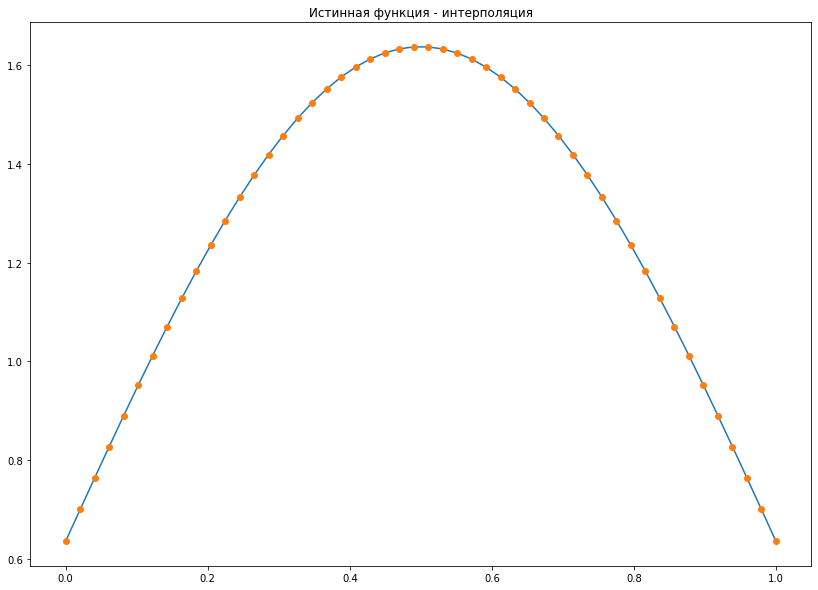

In [207]:
x = np.linspace(0,1,50)
interp = scipy.interpolate.splrep(solve(9)[1], solve(9)[0])
f_interpol = scipy.interpolate.splev(x, interp)
plt.figure(figsize=(14,10))
plt.plot(x,real_f(x),x,f_interpol,'o')
plt.title("Истинная функция - интерполяция")
plt.show()

Видим, что точки в целом ложаться, но можно заметить, что слегка не точно, для этого построим график разности нашей интерполяции и истинногорешения

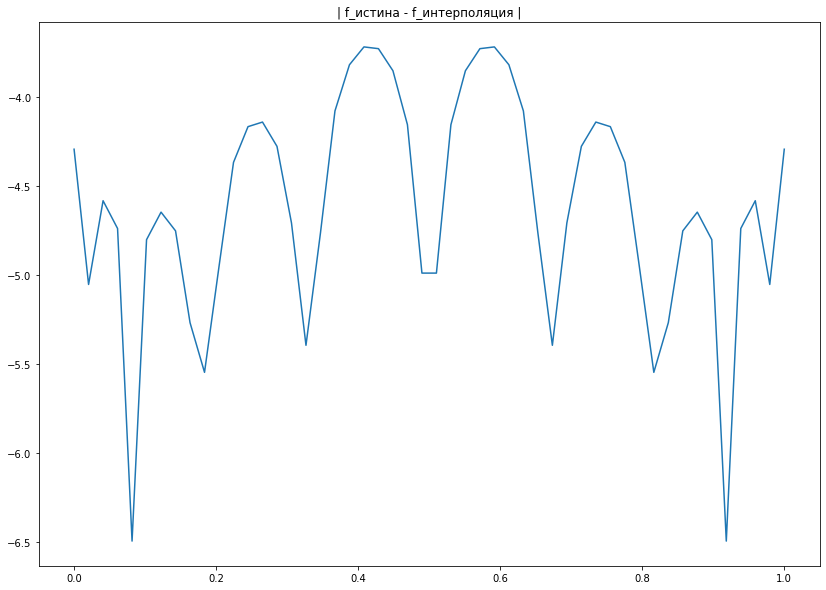

In [209]:
plt.figure(figsize=(14,10))
plt.plot(x,np.log10(abs(real_f(x) - f_interpol)))
plt.title("| f_истина - f_интерполяция |")
plt.show()

Видим, что точность у нас тут скачет в диапозоне от 1e-4 до 1e-6 где-то. Вообще такие значения не очень удовлетворяют. Все-таки большая разница

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j) $$(назовем этот способ "новая интерполяция")$$
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

In [215]:
def f1(x):
    sum = []
    for i in range(len(solve(9)[0])): #по сути у нас второй член это просто константа, поэтому просто посчитаем ее
        sum.append(solve(9)[2][i]*solve(9)[0][i])
    return np.sin(np.pi*x) + 1/2*np.sum(sum)

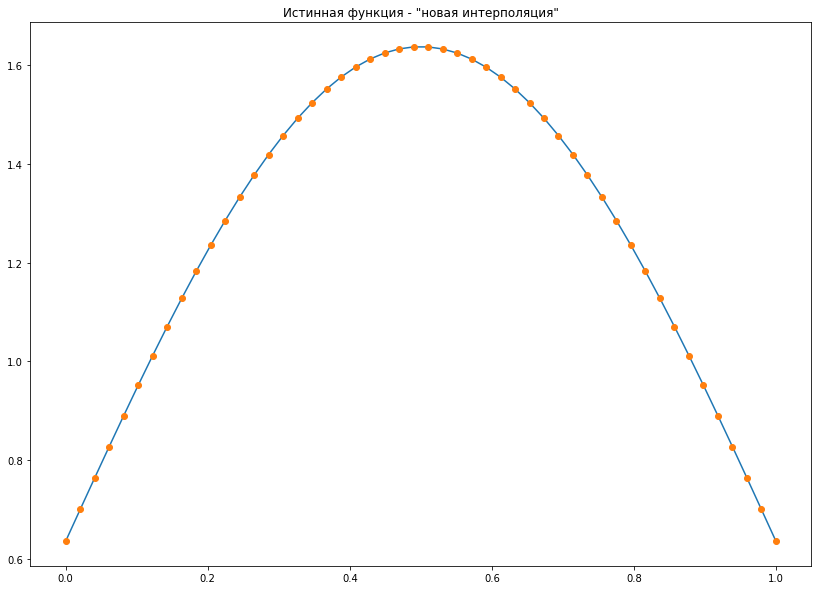

In [206]:
plt.figure(figsize=(14,10))
plt.plot(x,real_f(x),x,f1(x),'o')
plt.title('Истинная функция - "новая интерполяция"')
plt.show()

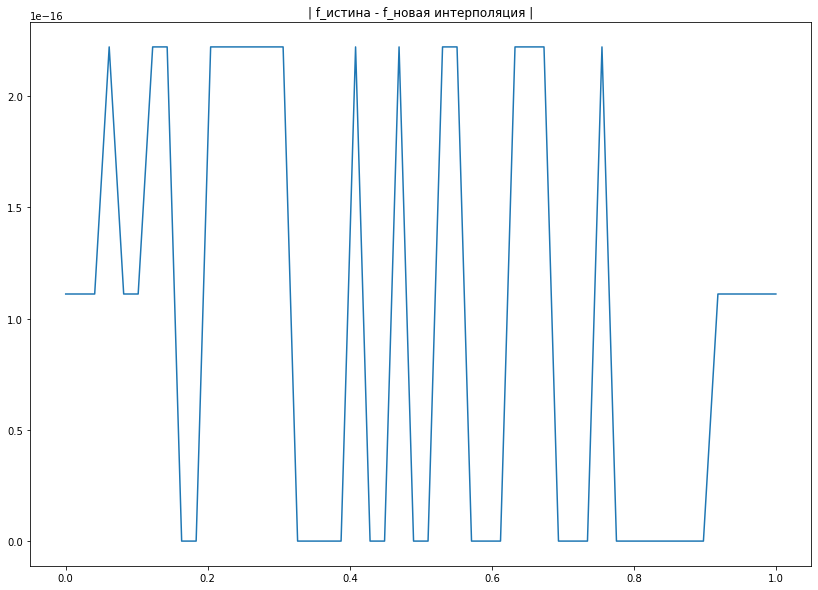

In [211]:
plt.figure(figsize=(14,10))
plt.plot(x,abs(real_f(x) - f1(x)))
plt.title("| f_истина - f_новая интерполяция |")
plt.show()

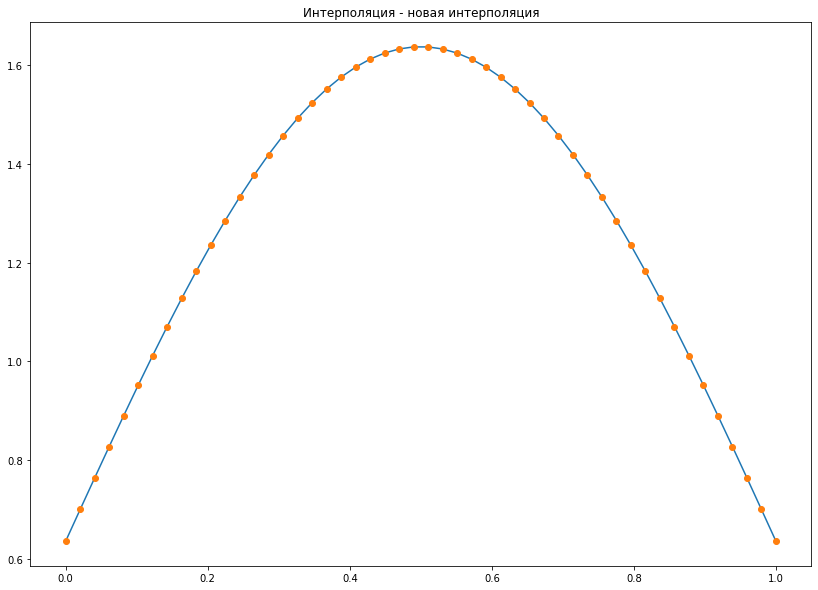

In [212]:
plt.figure(figsize=(14,10))
plt.plot(x,f_interpol,x,f1(x),'o')
plt.title("Интерполяция - новая интерполяция")
plt.show()

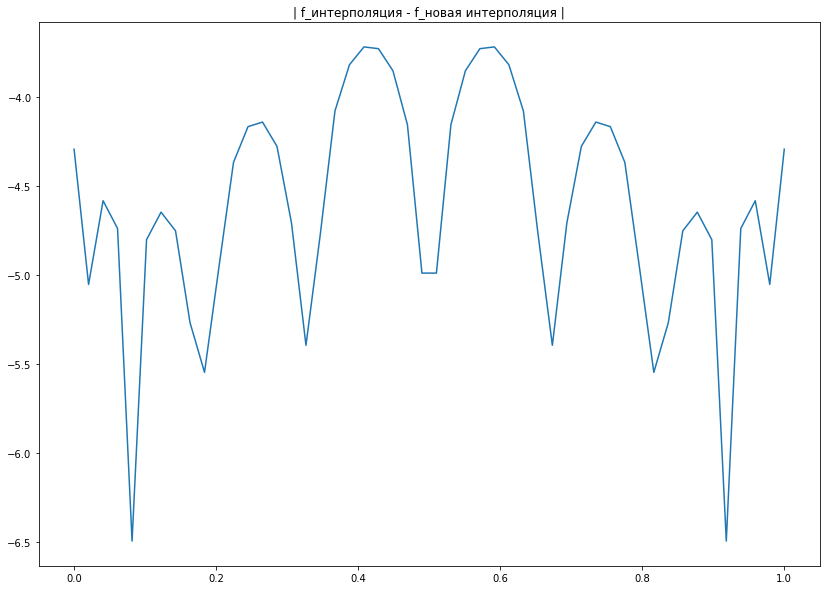

In [214]:
plt.figure(figsize=(14,10))
plt.plot(x,np.log10(abs(f_interpol - f1(x))))
plt.title("| f_интерполяция - f_новая интерполяция |")
plt.show()

Видим, что разброс в случае, когда сравниваем интерполяцию и новую интерполяцию, похож на первый пункт этой задачи(диапозон (1е-4 -- 1е-6). Но если мы посмотрим на график, где мы расмотрим на различия новой интерполяции и истинной функции, то там разница достигает порядка 1е-16,что показывает почти абсолютную идентичность с нашей истинной функцией. И мы получили желаемый результат - нахождение решение нашего интегрального уравнения. Способ "новая интерполяция" работает очень даже хорошо.